In [7]:
from ecell4 import *
from ecell4.extra import ensemble
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

simrun=600#0#00#0
duration = 1000
nproc=60
L=cbrt(100)
Ca=5.
Cb=1.
k0= 0.1
method='multiprocessing'

def write(name,obs):
    f=open(name,'w')
    data = np.array(obs.data()).T
    np.savetxt(name,np.column_stack([data[0],data[1]]),delimiter=',',fmt='%s')
    f.close()        
    print('saving into',name)        
    e=open(name+'_err','w')        
    err = np.array(obs.error()).T        
    np.savetxt(name+'_err',np.column_stack([err[0],err[1]]),delimiter=',',fmt='%s')
    e.close()
    print('saving into',name+'_err')

def singlerun(rm,D,solver='ode',intrinsic=False,simrun=1):   
    print(solver)
    V = L**3 
    if solver=='spa':
        solver=("spatiocyte",rm*1.0208582)
        V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),rm*1.0208582)    
    elif solver=='G':
        solver = ("gillespie")
    keff = k0/Ca/Cb
    Nb=int(Cb*V)
    print('Nb',Nb)
    kd = 4*np.pi*rm*2*D*2
    ka = keff*kd/(kd-keff)
    assert(ka>0)
    with species_attributes():
        A | {'D': D, 'radius':rm*1.0208582  }
        B | {'D': D, 'radius':rm*1.0208582  }

    with reaction_rules():
        ~A > A | k0
        A + B >B | (ka if intrinsic else keff)
    m = get_model()
    print('rm={:.3},D={:.3}'.format(rm,D))
    print('kon={:.3},ka={:.3},kd={:.3},keff={:.3},kfactor={:.3},V={:.3}'.format(k0,ka,kd,keff,ka/kd,V))
    if simrun >1    :
        obs=ensemble.ensemble_simulations(duration,n=simrun, y0={'B':Nb},model=m, solver=solver,volume=ones()*L,species_list=["A"],return_type='observer',nproc=nproc,method=method,path='tmp')#,return_type="observer")
    else:
        obs=run_simulation(duration,model=m,y0={'B':Nb},return_type='observer',species_list=['A'],solver=solver,volume=ones()*L)
    data = np.array(obs.data()).T
    print('mean [A]',np.mean(data[1][50:])/V)   
    write('/home/chew/outputdata/sturrock_bd_{}_rm{:.3}_D{:.3}_L{:.3}b'.format('spa',rm,D,L),obs)
    return obs

#obs2=singlerun(0.05,0.1,'spa',True,simrun)   
#obs3=singlerun(0.05,0.01,'spa',True,simrun)   
#obs4=singlerun(0.1,0.01,'spa',True,simrun)   
#obs5=singlerun(0.1,0.1,'spa',True,simrun)   
#obs6=singlerun(0.1,0.005,'spa',True,simrun)   
#obs7=singlerun(0.02,0.1,'spa',True,simrun)   
#obs8=singlerun(0.02,0.02,'spa',True,simrun)   
#obs9=singlerun(0.05,0.02,'spa',True,simrun)   
#obs1=singlerun(0.05,0.1,'spa',True,simrun)   
#for job in [[0.005,0.1],[0.02,0.1]]:
for job in [[0.05,0.02]]:#[[0.02,0.02],[0.05,0.01]]:#[0.05,0.1],[0.05,0.01]]:
    obs=singlerun(job[0],job[1],'spa',True,simrun)
    #obs=singlerun(job[0],job[1],'G',False,simrun)

    

spa
Nb 108
rm=0.05,D=0.02
kon=0.1,ka=0.0332,kd=0.0503,keff=0.02,kfactor=0.661,V=1.08e+02
mean [A] 4.84574664447
saving into /home/chew/outputdata/sturrock_bd_spa_rm0.05_D0.02_L4.64b
saving into /home/chew/outputdata/sturrock_bd_spa_rm0.05_D0.02_L4.64b_err


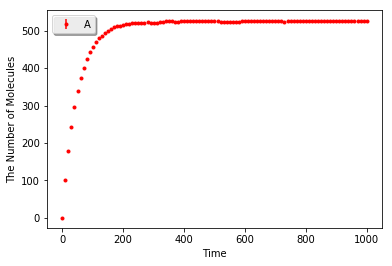

In [9]:
#viz.plot_number_observer(obs4,'r.',obs2,'g.',obs3,'k-',obs5,'y-',obs6,'c-')
viz.plot_number_observer(obs,'r.')

In [4]:
V=L**3
np.array(obs.error()).T[1][-1]/V  

0.02376839077430359

In [5]:
np.array(obs.data()).T[1][-1]/L**3

5.0606000000000018

In [10]:
100**(1./3)

4.641588833612778